In [51]:
import os
CWD = os.path.abspath("")
os.chdir(CWD)
from collections import defaultdict
import pandas as pd
import csv
from utils import load_json, save_json, sanitize

from minedatabase.pickaxe import Pickaxe
from minedatabase.utils import get_compound_hash

from rdkit.Chem import CanonSmiles, Draw
from rdkit import Chem
from rdkit.Chem import AllChem
import matplotlib.pyplot as plt
from pathway_utils import get_stoich_pk, get_reverse_paths_to_starting
import numpy as np
import PIL

In [59]:
pk = Pickaxe()
expansion_dir = '../../data_from_quest/bottle/'
fn = "ccm_v0_to_mvacid_gen_4_tan_sample_1_n_samples_1000.pk"
path = expansion_dir + fn

# pk.load_pickled_pickaxe("/projects/b1039/spn1560/bottle/succinate_to_mvacid_gen_4_tan_sample_n_samples_1000.pk") # Load results
pk.load_pickled_pickaxe(path) # Load results

----------------------------------------
Intializing pickaxe object

Done intializing pickaxe object
----------------------------------------

Loading ../../data_from_quest/bottle/ccm_v0_to_mvacid_gen_4_tan_sample_1_n_samples_1000.pk pickled data.
Loaded 58577 compounds
Loaded 77962 reactions
Loaded 3604 operators
Loaded 1 targets
Took 3.6460213661193848


# Generate Pathways

In [60]:
from pathway_utils import create_graph_from_pickaxe

# Function to patch older results that weren't made with updated PickaxeGeneric code
def rename_smiles_reaction(pk):
    for rxn in pk.reactions.values():
        rxn["SMILES_rxn"] = rxn["SMILES_reaction"]
        
# Create the initial graph
DG, rxn, edge = create_graph_from_pickaxe(pk, "Biology")
starting_nodes = []
bad_nodes = []
for n in DG.nodes():
    try:
        if DG.nodes()[n]["Type"] == "Starting Compound":
            starting_nodes.append(n)
    except:
        bad_nodes.append(n)

RDKit ERROR: [15:27:37] Can't kekulize mol.  Unkekulized atoms: 19 23 26 27 28 29 30 31 33 34
RDKit ERROR: 
[15:27:37] Can't kekulize mol.  Unkekulized atoms: 19 23 26 27 28 29 30 31 33 34

RDKit ERROR: [15:27:41] Can't kekulize mol.  Unkekulized atoms: 19 23 26 27 28 29 30 31 33 34
RDKit ERROR: 
[15:27:41] Can't kekulize mol.  Unkekulized atoms: 19 23 26 27 28 29 30 31 33 34

RDKit ERROR: [15:27:41] Can't kekulize mol.  Unkekulized atoms: 19 23 26 27 28 29 30 31 33 34
RDKit ERROR: 
[15:27:41] Can't kekulize mol.  Unkekulized atoms: 19 23 26 27 28 29 30 31 33 34

RDKit ERROR: [15:27:41] Can't kekulize mol.  Unkekulized atoms: 19 23 26 27 28 29 30 31 33 34
RDKit ERROR: 
[15:27:41] Can't kekulize mol.  Unkekulized atoms: 19 23 26 27 28 29 30 31 33 34

RDKit ERROR: [15:27:41] Can't kekulize mol.  Unkekulized atoms: 19 23 26 27 28 29 30 31 33 34
RDKit ERROR: 
[15:27:41] Can't kekulize mol.  Unkekulized atoms: 19 23 26 27 28 29 30 31 33 34

RDKit ERROR: [15:27:41] Can't kekulize mol.  Unkek

# Deprecated

In [55]:
from minedatabase.pickaxe import Pickaxe
from minedatabase import utils

import PIL

from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from pathway_utils import (
    Pathway, count_cpds_and_rxns, get_reverse_paths_to_starting, path_to_generation, create_graph_from_pickaxe, add_nodes_from_pickaxe
)

def get_found_locations(smi):
    isin_list = []
    for key, val in df_stereo_matches.items():
        if smi in val:
            isin_list.append(key)
            
    return isin_list

class Pathways:
    def __init__(self, target_cid, pathways, DG, feas_dict):
        self.target_id = target_cid
        self.pathways = [Pathway(target_cid, pathway, DG, feas_dict) for pathway in pathways]

    @property
    def terminal_generation(self):
        return [pathway.terminal_generation for pathway in self.pathways]
    

# rules_to_exclude = ['rule0028_46']
# rules_to_exclude = ['rule0028_51', 'rule0028_46', 'rule0028_50', 'rule0043_12']
# rules_to_exclude = ['rule0028_51', 'rule0028_46', 'rule0028_50']
# rules_to_exclude = ['rule0028_50', 'rule0043_12']
rules_to_exclude = []

def contains_rule(pathway, DG):
    rules = set()
    for keyi in pathway.reaction_stoichs.keys():
        rules_i = DG.nodes()[keyi]["Rule"]
        rules.update(rules_i)

    for rule in rules_to_exclude:
        if rule in rules:
            return True
        
    return False

In [56]:
# Params
generations = 4
max_depth = generations*2
paths_dict = {}

# Fake feas dict
feas_dict = {rxn: True for rxn in [i for i in DG.nodes() if i.startswith("R")]}

# Specify Targets / Starting Cpds
target_smi = pk.target_smiles[0]
target_cids = [get_compound_hash(smi)[0] for smi in pk.target_smiles]
starting_cpds = [get_compound_hash(val["SMILES"])[0] for val in pk.compounds.values() if val["Type"].startswith("Start")]

# Loop through targets and get pathways from targets to starting compounds
for node in target_cids:
    paths = get_reverse_paths_to_starting(DG, begin_node=node, end_nodes=starting_cpds, max_depth=max_depth)
    # If we find paths then reverse those paths and assign to a dictionary
    if paths:
        paths_dict[node] = list(set([tuple(path[1::2]) for path in [[*reversed(ind_path)] for ind_path in paths]]))

target_cid = target_cids[0]
target_paths = [Pathway(target_cid, pathway, DG, feas_dict) for pathway in paths_dict[target_cid]]

pathways = Pathways(target_cid, paths_dict[target_cids[0]], DG, feas_dict)
pathways.pathways = [path for path in pathways.pathways if not (target_smi in path.sources)] # target is starting

len(pathways.pathways)

22434

In [ ]:
n = 0
paths = paths_dict[target_cids[0]][n]

i = 0
while i < len(paths):
    if contains_rule(pathways.pathways[i], DG):
        i += 1
    else:
        ix = i
        rxn_stoichs = pathways.pathways[ix].reaction_stoichs
        # print("Thermo", ix)
        # print("MDF ", pathways.pathways[ix].MDF)
        # print("Sequence ", pathways.pathways[ix].reaction_types)
        # print("Starting", pathways.pathways[ix].sources)
        # print("Sinks", pathways.pathways[ix].sinks)

        reactions = []
        for rxn_stoich in rxn_stoichs.values():
            products = ".".join([".".join([smi]*stoich) for smi, stoich in rxn_stoich.items() if stoich >= 0])
            reactants = ".".join([".".join([smi]*abs(stoich)) for smi, stoich in rxn_stoich.items() if stoich <= 0])

            reaction = ">>".join([reactants, products])
            reactions.append(reaction)

        ri = -1
        i +=1 

        # for keyi in pathways.pathways[ix].reaction_stoichs.keys():
        #     print(keyi, DG.nodes()[keyi])
        
        # print(reactions)
        break

rxn_images = [
    Draw.ReactionToImage(
        AllChem.ReactionFromSmarts(rxn, useSmiles=True),
        subImgSize=(200, 200), useSVG=False, drawOptions=None, returnPNG=False
    ) for rxn in reactions
]

def get_concat_v(im1, im2):
    concat_v = PIL.Image.new('RGB', (im1.width, im1.height + im2.height))
    concat_v.paste(im1, (0, 0))
    concat_v.paste(im2, (0, im1.height))
    return concat_v

# image = rxn_images[0]
# for rxn_image in rxn_images[1:]:
#     image = get_concat_v(image, rxn_image)

# New code

In [62]:
# Define classes for pathway and reaction entries

class pathway:
    def __init__(self, rhashes, starter_hash=None, target_hash=None, prc_mcs=None, dG=None):
        self.starter = starter_hash
        self.target = target_hash
        self.rhashes = rhashes # Tuple of reaction hash ids
        self.prc_mcs = prc_mcs # Peri-rxn-ctr MCS score ave over reactions
        self.dG = dG # Placeholder for thermo

class reaction:
    def __init__(self, rid, smarts, rules=[], known_rxns=[]):
        self.rid = rid
        self.smarts = smarts
        self.rules = rules
        self.known_rxns = known_rxns

In [63]:
# Get pathways

# Params
generations = 4
max_depth = generations * 2
paths = []

# Specify Targets / Starting Cpds
target_smi = pk.target_smiles[0]
target_cids = [get_compound_hash(smi)[0] for smi in pk.target_smiles]
starting_cpds = [get_compound_hash(val["SMILES"])[0] for val in pk.compounds.values() if val["Type"].startswith("Start")]

# Loop through targets and get pathways from targets to starting compounds
for this_target in target_cids:
    this_paths = get_reverse_paths_to_starting(DG, begin_node=this_target, end_nodes=starting_cpds, max_depth=max_depth)
    # If we find paths then reverse those paths and assign to a dictionary
    if this_paths:
        this_paths = list(set([tuple(path[1::2]) for path in [[*reversed(ind_path)] for ind_path in this_paths]]))
        for elt in this_paths:
            for r in pk.reactions[elt[0]]["Reactants"]:
                if r[-1] in starting_cpds:
                    paths.append(pathway(rhashes=elt, starter_hash=r[-1], target_hash=this_target)) 

In [65]:
# Make reaction dict

# PK reaction hash to rxn sma

def rxn_hash_2_rxn_sma(rhash, pk):
    rxn_stoich = get_stoich_pk(rhash, pk)
    products = ".".join([".".join([smi]*stoich) for smi, stoich in rxn_stoich.items() if stoich >= 0])
    reactants = ".".join([".".join([smi]*abs(stoich)) for smi, stoich in rxn_stoich.items() if stoich <= 0])
    rxn_sma = ">>".join([reactants, products])
    return rxn_sma

pred_rxns = {}
degen_rhashes = defaultdict(lambda : 1)
for elt in paths:
    for this_rhash in elt.rhashes:
        if this_rhash not in pred_rxns:
            rxn_sma = rxn_hash_2_rxn_sma(this_rhash, pk)
            pred_rxns[this_rhash] = reaction(this_rhash, rxn_sma)
        else:
            degen_rhashes[this_rhash] += 1


In [66]:
# Put paths in dict indexed by starter-target pairs

st_paths = defaultdict(list)
# target_names = ['2-methyleneglutarate', '4-methyleneglutamate']
target_id_2_name = {'C6ec1611229ff4fc7a19244967c7716266fc021a1': 'mvacid'}

for elt in paths:
    t_name = target_id_2_name[elt.target]
    s_name = pk.compounds[elt.starter]["ID"]
    st_paths[(s_name, t_name)].append(elt)

for k,v in st_paths.items():
    print(k, len(v))

('succinate', 'mvacid') 17
('fumarate', 'mvacid') 557
('acetate', 'mvacid') 2
('pyruvate', 'mvacid') 3


In [70]:
# Load in IMT rule mapping

# Load rules
rules_path = '../src/rules/JN3604IMT_rules.tsv'
all_rules = []
with open(rules_path, 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    for row in reader:
        all_rules.append(row[0])

all_rules = all_rules[1:]
rule_df = pd.read_csv(rules_path, delimiter='\t')
rule_df.set_index('Name', inplace=True)

# Load mapping
rxn2rule = {}

db_names = ['_mc_v21', '_brenda', '_kegg']
suffix = '_imt_rules_enforce_cof.csv'
for name in db_names:
    mapping_path = '../data/mapping/mapping' + name + suffix
    with open(mapping_path, 'r') as f:
        reader = csv.reader(f)
        for row in reader:
            if len(row) == 1:
                rxn2rule[row[0]] = []
            else:
                rxn2rule[row[0]] = row[1:]


# Make rule2rxn
rule2rxn = {}
for k,v in rxn2rule.items():
    for elt in v:
        if elt not in rule2rxn:
            rule2rxn[elt] = [k]
        else:
            rule2rxn[elt].append(k)

# Load all known reactions into dict
known_rxns = {}
pref = '../data/mapping/'
suffs = ['mc_v21_as_is.json', 'brenda_as_is.json', 'kegg_as_is.json']

for elt in suffs:
    known_rxns.update(load_json(pref + elt))

In [71]:
def make_rxn_sma(rxn_entry):
    '''
    Convert our standard rxn json
    entry into a reaction smarts
    '''
    reactants = sanitize(list(rxn_entry[0].values()))
    products = sanitize(list(rxn_entry[1].values()))
    sma = ".".join(reactants) + ">>" + ".".join(products)
    return sma

In [72]:
# Populate reaction objects in rxn dict w/ known reactions

for k, v in pred_rxns.items():
    this_rules = list(pk.reactions[k]["Operators"])
    this_known_rxns = []
    for elt in this_rules:
        if elt in rule2rxn:
            this_rxn_ids = rule2rxn[elt]
            for this_id in this_rxn_ids:
                this_sma = make_rxn_sma(known_rxns[this_id])
                this_known_rxns.append((-1, this_sma, this_id))
    
    v.known_rxns = list(set(this_known_rxns))


In [77]:
# Pathway drawing functions

def draw_rxn(rxn_sma):
    return Draw.ReactionToImage(
        AllChem.ReactionFromSmarts(rxn_sma, useSmiles=True),
        subImgSize=(200, 200), useSVG=False, drawOptions=None, returnPNG=False
    )

def get_concat_h(im1, im2):
    dst = PIL.Image.new('RGB', (im1.width + im2.width, max(im1.height, im2.height)))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst

def get_concat_v(im1, im2):
    dst = PIL.Image.new('RGB', (max(im1.width, im2.width), im1.height + im2.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (0, im1.height))
    return dst

def draw_pathway(pred_known_pairs):
    for i, elt in enumerate(pred_known_pairs):
        if i == 0:
            img = get_concat_h(*elt)
        else:
            img = get_concat_v(img, get_concat_h(*elt))

    return img


In [81]:
pred_known_pairs = []
example_path = st_paths[('fumarate', 'mvacid')][-1].rhashes
rng = np.random.default_rng(seed=1208)
for elt in example_path:
    this_pred = pred_rxns[elt]
    this_idx = rng.integers(0, len(this_pred.known_rxns) - 1)
    pred_img = draw_rxn(this_pred.smarts)
    known_img = draw_rxn(this_pred.known_rxns[this_idx][1])
    pred_known_pairs.append([pred_img, known_img])

path_img = draw_pathway(pred_known_pairs)
path_img.save('../artifacts/test_concat.png')
    

In [75]:
for elt in pred_known_pairs:
    print(elt[0].width, elt[1].width)

for elt in pred_known_pairs:    
    print(elt[0].height, elt[1].height)

800 800
1000 1000
1600 1600
1000 1000
200 200
200 200
200 200
200 200


# Old code

In [12]:
i = 0
j = 0

0
R488879f54eebec1a3a1f9858b8cbfc540702bbf957fc2c435ecc35496651e4b1 {'bipartite': 1, 'Rule': {'rule0255_1'}, 'Type': 'Biology', 'Stoich': {'O=C(O)C=CC(=O)O': -1, 'CC(=O)SCCNC(=O)CCNC(=O)C(O)C(C)(C)COP(=O)(O)OP(=O)(O)OCC1OC(n2cnc3c(N)ncnc32)C(O)C1OP(=O)(O)O': -1, 'CC(=O)SCCNC(=O)CCNC(=O)C(O)C(C)(COP(=O)(O)OP(=O)(O)OCC1OC(n2cnc3c(N)ncnc32)C(O)C1OP(=O)(O)O)CC(O)(O)C=CC(=O)O': 1}, 'feasible': None, 'Reactants': [(1, 'X50d0c91f2e257f422cb9b71e12354896d9d58af8'), (1, 'Cd2c8451fbe5563b9a086b59c26af17772205613a')], 'Products': [(1, 'C49f83c694318d0b747ec9bfa766828618b2ef3b8')]} 

Rb6ecdcc1eb1d4f2e2bcb3d49f55cf44c27705170b36a50a70feb150614e9902d {'bipartite': 1, 'Rule': {'rule0028_50'}, 'Type': 'Biology', 'Stoich': {'CC(=O)SCCNC(=O)CCNC(=O)C(O)C(C)(COP(=O)(O)OP(=O)(O)OCC1OC(n2cnc3c(N)ncnc32)C(O)C1OP(=O)(O)O)CC(O)(O)C=CC(=O)O': -1, 'CC(=O)SCCNC(=O)CCNC(=O)C(O)C(C)(C)COP(=O)(O)OP(=O)(O)OCC1OC(n2cnc3c(N)ncnc32)C(O)(C(O)(O)C=CC(=O)O)C1OP(=O)(O)O': 1}, 'feasible': None, 'Reactants': [(1, 'C49f83c694

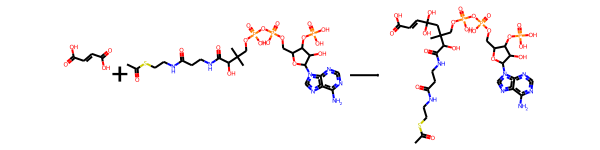

In [27]:
i=0

paths = paths_dict[target_cids[0]][i]

print(i)
rxn_stoichs = pathways.pathways[i].reaction_stoichs

while contains_rule(pathways.pathways[i], DG):
    # print(i)
    i += 1

reactions = []
for rxn_stoich in rxn_stoichs.values():
    products = ".".join([".".join([smi]*stoich) for smi, stoich in rxn_stoich.items() if stoich >= 0])
    reactants = ".".join([".".join([smi]*abs(stoich)) for smi, stoich in rxn_stoich.items() if stoich <= 0])

    reaction = ">>".join([reactants, products])
    reactions.append(reaction)

for keyi in pathways.pathways[i].reaction_stoichs.keys():
    print(keyi, DG.nodes()[keyi], '\n')

AllChem.ReactionFromSmarts(reactions[0], useSmiles=True)


In [14]:
# Sort pathways into unique combinations of reaction rules

# Each transformation in a pathway
# has one or multiple rules associated w it
rule_set_2_id = {} # Maps a set of rules to an integer id
combo_2_pwy_idx = defaultdict(list) # Maps a combination of rule sets to pway index
idx = 0 # For pway index

for i in range(len(pathways.pathways)):
    this_combo = []
    for keyi in pathways.pathways[i].reaction_stoichs.keys():
        this_rule_set = tuple(sorted(DG.nodes()[keyi]['Rule']))
        if this_rule_set not in rule_set_2_id:
            rule_set_2_id[this_rule_set] = idx
            idx += 1

id_2_rule_set = {v:k for k,v in rule_set_2_id.items()} # Map back from id to rule set
        

for i in range(len(pathways.pathways)):
    this_combo = []
    for keyi in pathways.pathways[i].reaction_stoichs.keys():
        this_rule_set = tuple(sorted(DG.nodes()[keyi]['Rule']))
        this_combo.append(rule_set_2_id[this_rule_set])

    this_combo = tuple(sorted(this_combo))
    combo_2_pwy_idx[this_combo].append(i)

In [15]:
print(len(combo_2_pwy_idx.keys())) # Number of unique rule combinations
print([len(v) for k,v in combo_2_pwy_idx.items()]) # Degeneracy of rule combos

1320
[2164, 883, 1, 249, 8, 4, 3, 464, 8, 16, 11, 330, 130, 10, 16, 1, 13, 5, 266, 144, 3, 16, 6, 1, 15, 5, 16, 16, 17, 3, 249, 3, 22, 232, 7, 6, 1, 144, 144, 5, 1, 19, 4, 3, 2, 1, 32, 6, 16, 68, 19, 10, 6, 3, 1, 1, 1, 3, 19, 3, 4, 2, 9, 5, 3, 33, 3, 8, 5, 4, 4, 2, 8, 10, 3, 3, 1, 144, 1, 6, 4, 2, 16, 6, 8, 10, 3, 4, 16, 11, 2, 4, 16, 5, 23, 9, 4, 9, 1, 7, 2, 1, 3, 7, 4, 3, 2, 5, 12, 3, 3, 11, 6, 4, 3, 23, 2, 5, 10, 2, 2, 22, 10, 3, 29, 9, 1, 26, 28, 17, 9, 3, 4, 11, 19, 2, 1, 19, 2, 12, 3, 1, 3, 2, 2, 2, 19, 15, 1, 6, 1, 1, 2, 3, 6, 14, 2, 4, 2, 14, 19, 4, 7, 1, 1, 1, 14, 6, 6, 2, 5, 16, 8, 15, 4, 10, 1, 2, 18, 6, 4, 17, 4, 11, 2, 3, 4, 1, 6, 3, 6, 1, 2, 3, 36, 16, 3, 3, 1, 8, 9, 1, 4, 1, 4, 3, 13, 2, 28, 1, 1, 3, 16, 3, 8, 1, 16, 2, 19, 7, 4, 4, 9, 24, 8, 3, 3, 13, 2, 2, 1, 2, 5, 1, 9, 3, 2, 2, 3, 3, 4, 35, 2, 1, 19, 1, 2, 7, 3, 1, 4, 5, 3, 28, 4, 3, 16, 16, 6, 4, 3, 3, 2, 3, 2, 13, 2, 2, 15, 2, 1, 15, 1, 3, 8, 1, 2, 12, 23, 16, 3, 2, 2, 9, 4, 2, 1, 2, 1, 2, 16, 3, 5, 4, 2, 3, 2, 3, 

In [17]:
# Load in IMT rule mapping

# Load rules
rules_path = '../src/rules/JN3604IMT_rules.tsv'
all_rules = []
with open(rules_path, 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    for row in reader:
        all_rules.append(row[0])

all_rules = all_rules[1:]
rule_df = pd.read_csv(rules_path, delimiter='\t')
rule_df.set_index('Name', inplace=True)

# Load mapping

all_rxns = []
mapped_rxns = []
unmapped_rxns = []
rxn2rule = {}

db_names = ['_mc_v21', '_brenda', '_kegg']
suffix = '_imt_rules_enforce_cof.csv'
for name in db_names:
    mapping_path = '../data/mapping/mapping' + name + suffix
    with open(mapping_path, 'r') as f:
        reader = csv.reader(f)
        for row in reader:
            all_rxns.append(row[0])
            if len(row) == 1:
                unmapped_rxns.append(row[0])
                rxn2rule[row[0]] = []
            else:
                mapped_rxns.append(row[0])
                rxn2rule[row[0]] = row[1:]

print("Mapping fraction: {}".format(len(mapped_rxns) / len(all_rxns)))
print("Total # reactions analyzed: {}".format(len(all_rxns)))


# Make rule2rxn
rule2rxn = {}
for k,v in rxn2rule.items():
    for elt in v:
        if elt not in rule2rxn:
            rule2rxn[elt] = [k]
        else:
            rule2rxn[elt].append(k)

# Load all known reactions into dict
known_rxns = {}
pref = '../data/mapping/'
suffs = ['mc_v21_as_is.json', 'brenda_as_is.json', 'kegg_as_is.json']

for elt in suffs:
    known_rxns.update(load_json(pref + elt))

Mapping fraction: 0.7036698550158826
Total # reactions analyzed: 112702


In [18]:
# Look up known reactions mapped by each rule set used
id_2_mapped_rxns = defaultdict(list)
for k,v in rule_set_2_id.items():
    for elt in k:
        id_2_mapped_rxns[v] += rule2rxn[elt]

print([(k, len(v)) for k,v in id_2_mapped_rxns.items()])

[(0, 15), (1, 50), (2, 88), (3, 9), (4, 40), (5, 29), (6, 75), (7, 17), (8, 17), (9, 6), (10, 8), (11, 19), (12, 10), (13, 56), (14, 39), (15, 23), (16, 10), (17, 20), (18, 43), (19, 57), (20, 43), (21, 69), (22, 3), (23, 16), (24, 9), (25, 18), (26, 27), (27, 76), (28, 38), (29, 25), (30, 23), (31, 50), (32, 129), (33, 35), (34, 6), (35, 47), (36, 18), (37, 18), (38, 44), (39, 16), (40, 26), (41, 67), (42, 12), (43, 8), (44, 284), (45, 40), (46, 22), (47, 27), (48, 2), (49, 4), (50, 41), (51, 93), (52, 14), (53, 86), (54, 45), (55, 34), (56, 11), (57, 23), (58, 4), (59, 38), (60, 7), (61, 6), (62, 56), (63, 130), (64, 5), (65, 9), (66, 11), (67, 94), (68, 19), (69, 20), (70, 10), (71, 13), (72, 29), (73, 141), (74, 7), (75, 3), (76, 25), (77, 26), (78, 23), (79, 15), (80, 116), (81, 6), (82, 11), (83, 7), (84, 22), (85, 21), (86, 87), (87, 14), (88, 6), (89, 7), (90, 31), (91, 15), (92, 44), (93, 8), (94, 15), (95, 5), (96, 10), (97, 11), (98, 6), (99, 77), (100, 75), (101, 51), (102,

In [19]:
# Look up most mapped EC number for each rule (set)

# Load imt ec number csv
ec_df = pd.read_csv('../data/mapping/imt_rules_top_ec_numbers.csv', sep=',')
ec_df.set_index('rule', inplace=True)
ec_df.head()

for k,v in id_2_rule_set.items():
    for elt in v:
        if elt in ec_df.index:
            print(k, ec_df.loc[elt, 'top_3rd_digit'])
        # else:
        #     print(k, v)

0 4.1.3
1 5.4.4
2 2.8.3
3 4.1.99
4 1.1.99
7 4.1.3
11 5.3.1
13 2.8.3
14 4.2.1
16 4.1.2
17 1.3.1
18 1.4.1
21 1.13.11
23 2.3.1
24 1.3.5
26 1.3.3
27 5.4.3
27 5.4.4
29 6.2.1
31 6.2.1
32 1.3.1
32 1.3.1
33 1.3.1
35 3.7.1
36 4.1.1
36 4.1.3
38 5.4.99
39 4.3.1
40 4.3.1
41 6.2.1
42 2.8.3
45 2.1.1
46 1.3.1
47 2.6.1
48 4.1.1
51 5.4.4
51 5.4.99
54 2.8.2
55 2.7.1
56 2.1.1
57 1.2.1
59 2.3.1
62 2.4.1
63 2.3.1
66 4.1.3
67 5.4.4
67 5.3.3
70 4.2.1
73 1.3.1
73 1.3.1
76 1.14.13
77 2.8.3
78 1.2.1
79 1.1.1
80 2.6.1
81 4.2.1
83 4.2.1
84 2.4.1
86 5.4.99
86 5.4.3
86 5.4.4
87 2.7.2
90 1.1.1
92 5.3.3
94 4.1.1
94 4.1.1
97 6.3.1
98 1.1.98
99 5.3.1
101 1.3.8
102 4.1.1
102 4.1.3
103 1.3.1
104 1.14.13
105 1.1.3
106 1.3.1
107 1.1.1
107 1.1.1
107 1.1.1
108 5.4.3
109 1.13.12
110 1.1.5
112 1.2.1
113 1.1.1
113 1.1.1
113 1.1.1
114 2.3.1
115 2.5.1
117 4.1.1
118 4.1.1
119 2.3.1
120 4.1.3
122 4.2.1
123 1.2.1
125 2.1.3
126 1.3.1
128 1.1.1
129 4.1.1
130 4.2.1
132 2.3.3
133 3.5.99
134 4.1.2
139 1.3.5
140 4.2.1
141 4.1.2
142 4.2.1


In [20]:
combo_2_pwy_idx

defaultdict(list,
            {(0, 1, 2, 3): [0,
              2,
              14,
              22,
              34,
              40,
              42,
              47,
              50,
              51,
              56,
              66,
              67,
              68,
              70,
              82,
              101,
              102,
              106,
              109,
              110,
              113,
              118,
              119,
              125,
              126,
              131,
              138,
              144,
              151,
              154,
              160,
              162,
              166,
              176,
              180,
              181,
              187,
              203,
              204,
              211,
              212,
              214,
              215,
              216,
              220,
              221,
              224,
              234,
              236,
              242,
              245

In [21]:
i = 0 # Pwy id
j = -1 # Pred rxn id


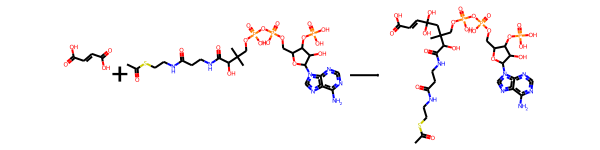

In [22]:
j+=1
rxn_stoichs = pathways.pathways[i].reaction_stoichs
dg_key = list(pathways.pathways[i].reaction_stoichs.keys())[j]
rule_set = tuple(sorted(DG.nodes()[dg_key]['Rule']))
rule_id = rule_set_2_id[rule_set]

nad_smi = CanonSmiles('C1=C(-C(=O)-N)-C=C-C=[N+]-1-*')
nadh_smi = CanonSmiles('C1=C(-C(=O)-N)-C-C=C-N-1-*')
succ_coa_smi = CanonSmiles('*SC(=O)CCC(=O)O')
benz_succ_coa_smi = CanonSmiles('*SC(=O)[C@@H](CC(=O)O)Cc1ccccc1')
prop_coa_smi = CanonSmiles('CCC(=O)S*')
d_methyl_malonyl_coa_smi = CanonSmiles('C[C@@H](C(=O)O)C(=O)S*')

short_lut = {'NC(=O)C1=CN(C2OC(COP(=O)(O)OP(=O)(O)OCC3OC(n4cnc5c(N)ncnc54)C(OP(=O)(O)O)C3O)C(O)C2O)C=CC1': nadh_smi,
             'NC(=O)c1ccc[n+](C2OC(COP(=O)(O)OP(=O)(O)OCC3OC(n4cnc5c(N)ncnc54)C(OP(=O)(O)O)C3O)C(O)C2O)c1': nad_smi, 
             'NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O)(O)OC[C@H]3O[C@@H](n4cnc5c(N)ncnc54)[C@H](O)[C@@H]3O)[C@@H](O)[C@H]2O)C=CC1': nadh_smi,
             'NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)(O)OP(=O)(O)OC[C@H]3O[C@@H](n4cnc5c(N)ncnc54)[C@H](O)[C@@H]3O)[C@@H](O)[C@H]2O)c1': nad_smi,
             'NC(=O)c1ccc[n+](C2OC(COP(=O)(O)OP(=O)(O)OCC3OC(n4cnc5c(N)ncnc54)C(O)C3O)C(O)C2O)c1': nad_smi,
             'NC(=O)C1=CN(C2OC(COP(=O)(O)OP(=O)(O)OCC3OC(n4cnc5c(N)ncnc54)C(O)C3O)C(O)C2O)C=CC1': nadh_smi,
             'CC(C)(COP(=O)(O)OP(=O)(O)OC[C@H]1O[C@@H](n2cnc3c(N)ncnc32)[C@H](O)[C@@H]1OP(=O)(O)O)[C@@H](O)C(=O)NCCC(=O)NCCSC(=O)CCC(=O)O': succ_coa_smi,
             'CC(C)(COP(=O)(O)OP(=O)(O)OC[C@H]1O[C@@H](n2cnc3c(N)ncnc32)[C@H](O)[C@@H]1OP(=O)(O)O)[C@@H](O)C(=O)NCCC(=O)NCCSC(=O)[C@@H](CC(=O)O)Cc1ccccc1': benz_succ_coa_smi,
             'CCC(=O)SCCNC(=O)CCNC(=O)[C@H](O)C(C)(C)COP(=O)(O)OP(=O)(O)OC[C@H]1O[C@@H](n2cnc3c(N)ncnc32)[C@H](O)[C@@H]1OP(=O)(O)O': prop_coa_smi,
             'C[C@@H](C(=O)O)C(=O)SCCNC(=O)CCNC(=O)[C@H](O)C(C)(C)COP(=O)(O)OP(=O)(O)OC[C@H]1O[C@@H](n2cnc3c(N)ncnc32)[C@H](O)[C@@H]1OP(=O)(O)O': d_methyl_malonyl_coa_smi
             
             }

short_lut = {}

reactions = []
for rxn_stoich in rxn_stoichs.values():
    reactants = []
    products = []
    for smi, stoich in rxn_stoich.items():
        if smi in short_lut:
                this_smi = short_lut[smi]
        else:
            this_smi = smi

        if stoich >= 0:
             products.append(".".join([this_smi] * stoich))
        elif stoich <= 0:
             reactants.append(".".join([this_smi] * abs(stoich)))

    reaction = ">>".join([".".join(reactants), ".".join(products)])
    reactions.append(reaction)


AllChem.ReactionFromSmarts(reactions[j], useSmiles=True)

In [23]:
reactions[j]

'O=C(O)C=CC(=O)O.CC(=O)SCCNC(=O)CCNC(=O)C(O)C(C)(C)COP(=O)(O)OP(=O)(O)OCC1OC(n2cnc3c(N)ncnc32)C(O)C1OP(=O)(O)O>>CC(=O)SCCNC(=O)CCNC(=O)C(O)C(C)(COP(=O)(O)OP(=O)(O)OCC1OC(n2cnc3c(N)ncnc32)C(O)C1OP(=O)(O)O)CC(O)(O)C=CC(=O)O'

In [24]:
k = 0

HYDROXYMETHYLGLUTARYL-COA-LYASE-RXN
0


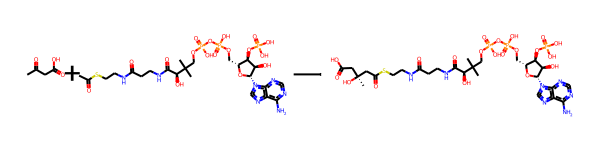

In [25]:
# k = 2 # Mapped known rxn list index
mapped_entry = known_rxns[id_2_mapped_rxns[rule_id][k]]
print(id_2_mapped_rxns[rule_id][k])
mapped_rxn = []
reactants = ".".join(mapped_entry[0].values())
products = ".".join(mapped_entry[1].values())

temp_reactants, temp_products = [], []
for elt in reactants.split('.'):
    if elt in short_lut:
        temp_reactants.append(short_lut[elt])
    else:
        temp_reactants.append(elt)

for elt in products.split('.'):
    if elt in short_lut:
        temp_products.append(short_lut[elt])
    else:
        temp_products.append(elt)

reactants, products = ".".join(temp_reactants), ".".join(temp_products)

mapped_rxn = ">>".join([reactants, products])
print(k)
k += 1
AllChem.ReactionFromSmarts(mapped_rxn, useSmiles=True)

In [59]:
known_rxns[id_2_mapped_rxns[rule_id][k]]

[{'(2R)-2-methylbutanedioic acid:0': 'CC(CC(=O)O)C(=O)O',
  'NAD+:0': 'NC(=O)c1ccc[n+](C2OC(COP(=O)(O)OP(=O)(O)OCC3OC(n4cnc5c(N)ncnc54)C(O)C3O)C(O)C2O)c1'},
 {'NADH:0': 'NC(=O)C1=CN(C2OC(COP(=O)(O)OP(=O)(O)OCC3OC(n4cnc5c(N)ncnc54)C(O)C3O)C(O)C2O)C=CC1',
  'citraconic acid:0': 'CC(=CC(=O)O)C(=O)O'}]

In [62]:
# for elt in id_2_mapped_rxns[rule_id]:
#     print(known_rxns[elt])

In [203]:
mapped_entry

[{'2-isopropyl-5-methylhexanal:0': 'CC(C)CCC(C=O)C(C)C',
  'NAD+:0': 'NC(=O)c1ccc[n+](C2OC(COP(=O)(O)OP(=O)(O)OCC3OC(n4cnc5c(N)ncnc54)C(O)C3O)C(O)C2O)c1'},
 {'2-isopropyl-5-methyl-2-hexenal:0': 'CC(C)CC=C(C=O)C(C)C',
  'NADH:0': 'NC(=O)C1=CN(C2OC(COP(=O)(O)OP(=O)(O)OCC3OC(n4cnc5c(N)ncnc54)C(O)C3O)C(O)C2O)C=CC1'}]

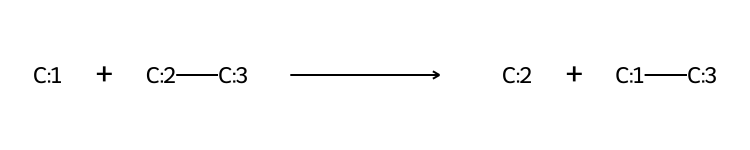

In [23]:
rule = '[#6;$([#6&!R]-[#6&!R]-&!@[#6&!R](=&!@[#8&!R])-&!@[#8&!R]):1].[#6;$([#6&!R]-&!@[#6&!R]):2]-[#6:3]>>[#6:2].[#6:1]-[#6:3]'
AllChem.ReactionFromSmarts(rule)

In [21]:
from rxnmapper import RXNMapper
rxnmapper = RXNMapper()

/home/stef/miniconda3/envs/mine/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of the model checkpoint at /home/stef/miniconda3/envs/mine/lib/python3.7/site-packages/rxnmapper/models/transformers/albert_heads_8_uspto_all_1310k were not used when initializing AlbertModel: ['predictions.LayerNorm.weight', 'predictions.decoder.weight', 'predictions.dense.bias', 'predictions.dense.weight', 'predictions.decoder.bias', 'predictions.bias', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertModel from the checkpoint of a model that you expec

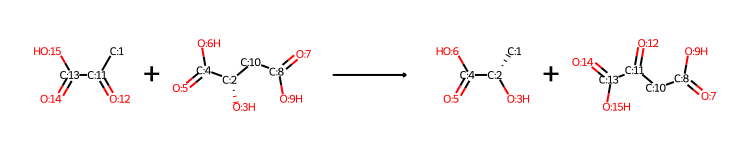

In [38]:
um_rxn = ".".join(mapped_entry[0].values()) + '>>' + ".".join(mapped_entry[1].values())
res = rxnmapper.get_attention_guided_atom_maps([um_rxn])
m_rxn = res[0]['mapped_rxn']
AllChem.ReactionFromSmarts(m_rxn, useSmiles=True)

In [44]:
def sanitize(list_of_smiles):
    sanitized_smiles = []
    for elt in list_of_smiles:
        temp_mol = Chem.MolFromSmiles(elt)
        Chem.rdmolops.RemoveStereochemistry(temp_mol)
        sanitized_smiles.append(Chem.MolToSmiles(temp_mol))    
    return sanitized_smiles

['CC(O)C(=O)O', 'O=C(O)CC(=O)C(=O)O']


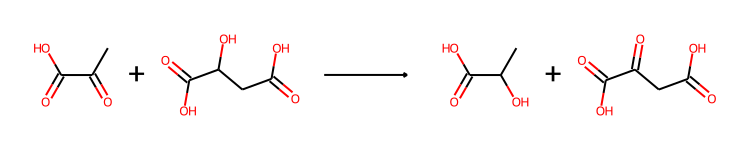

In [58]:
operator = Chem.rdChemReactions.ReactionFromSmarts(rule)
rs = sanitize(um_rxn.split('>>')[0].split('.'))
rs.reverse()
ps = sanitize(sorted(um_rxn.split('>>')[1].split('.')))
r_mol = tuple([Chem.MolFromSmiles(elt) for elt in rs])
outputs = operator.RunReactants(r_mol)

matched_output = None
for elt in outputs:
    this_os = sorted([Chem.MolToSmiles(o) for o in elt])
    if this_os == ps:
        print(this_os)
        matched_output = this_os

recap_rxn = '.'.join(rs) + '>>' + '.'.join(matched_output)
AllChem.ReactionFromSmarts(recap_rxn, useSmiles=True)

In [53]:
recap_rxn

'CC(=O)C(=O)O.O=C(O)CC(O)C(=O)OCC(O)C(=O)O>>.O=C(O)CC(=O)C(=O)O'

In [55]:
um_rxn

'O=C(O)C[C@H](O)C(=O)O.CC(=O)C(=O)O>>C[C@H](O)C(=O)O.O=C(O)CC(=O)C(=O)O'

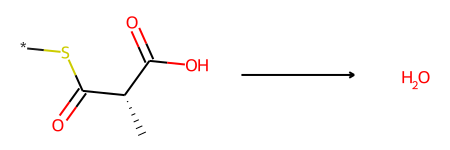

In [511]:
smi = CanonSmiles('C[C@@H](C(=O)O)C(=O)S*')
AllChem.ReactionFromSmarts(smi + '>>' + 'O', useSmiles=True)

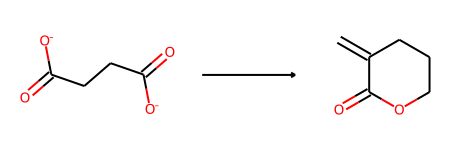

In [407]:
mvl_smi = 'C1(C(CCCO1)=C)=O'
succ_smi = 'C(CC(=O)[O-])C(=O)[O-]'
ha_mvl_prec_smi = 'C=C(CCCO)C(=O)O'

AllChem.ReactionFromSmarts(succ_smi + '>>' + mvl_smi, useSmiles=True)

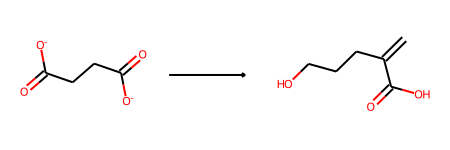

In [408]:
AllChem.ReactionFromSmarts(succ_smi + '>>' + ha_mvl_prec_smi, useSmiles=True)

In [208]:
foo = load_json('/home/stef/Tb/reaction_mapping/jos_rxn_data/metacyc.json')
foo

{'RXN-12199': [{'Pi:0': 'O=P(O)(O)O',
   'Pi:1': 'O=P(O)(O)O',
   'UMP:0': 'O=c1ccn([C@@H]2O[C@H](COP(=O)(O)O)[C@@H](O)[C@H]2O)c(=O)[nH]1'},
  {'UTP:0': 'O=c1ccn([C@@H]2O[C@H](COP(=O)(O)OP(=O)(O)OP(=O)(O)O)[C@@H](O)[C@H]2O)c(=O)[nH]1',
   'WATER:0': 'O',
   'WATER:1': 'O'},
  'A0JND9,B3A0N5,E0D877,F4JSH1,O18956,O75355,O80612,O93295,O96559,P40009,P49961,P50635,P55772,P80595,P97687,Q2QYE1,Q5DRK1,Q5MY95,Q6NQA8,Q6Z4P2,Q8H1D8,Q8H7L6,Q8K0L2,Q9FVC2,Q9FVC3,Q9MYU4,Q9SPM5,Q9SQG2,Q9USP2,Q9XI62,Q9Y5L3',
  'Unmapped'],
 'RXN-12199_reverse': [{'UTP:0': 'O=c1ccn([C@@H]2O[C@H](COP(=O)(O)OP(=O)(O)OP(=O)(O)O)[C@@H](O)[C@H]2O)c(=O)[nH]1',
   'WATER:0': 'O',
   'WATER:1': 'O'},
  {'Pi:0': 'O=P(O)(O)O',
   'Pi:1': 'O=P(O)(O)O',
   'UMP:0': 'O=c1ccn([C@@H]2O[C@H](COP(=O)(O)O)[C@@H](O)[C@H]2O)c(=O)[nH]1'},
  'A0JND9,B3A0N5,E0D877,F4JSH1,O18956,O75355,O80612,O93295,O96559,P40009,P49961,P50635,P55772,P80595,P97687,Q2QYE1,Q5DRK1,Q5MY95,Q6NQA8,Q6Z4P2,Q8H1D8,Q8H7L6,Q8K0L2,Q9FVC2,Q9FVC3,Q9MYU4,Q9SPM5,Q9SQG2,Q9USP2